___

___
# Analysis Of A Marketing Campaign For an E-Commerce Store

In this project, Working with a Mock-Up Advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. Here, Creating a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad
* 'Ad 1 - Ad 10': Tells us the ad on which the customer clicked
___

___
## Importing Libraries
Pandas - Numpy - MatPlotlib - Seaborn - SciPy - SkLearn


___

___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
df=pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0,0,0,0,0,0,0,0,0,0,0


** Use info and describe() on ad_data**

In [4]:
df.drop(["Ad Topic Line","City","Country","Timestamp"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Ad 1                      1000 non-null   int64  
 7   Ad 2                      1000 non-null   int64  
 8   Ad 3                      1000 non-null   int64  
 9   Ad 4                      1000 non-null   int64  
 10  Ad 5                      1000 non-null   int64  
 11  Ad 6                      1000 non-null   int64  
 12  Ad 7                      1000 non-null   int64  
 13  Ad 8                      1000 non-null   int64  
 14  Ad 9     

In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.502000,0.079000,0.081000,0.044000,0.075000,0.155000,0.009000,0.06100,0.125000,0.076000,0.026000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.500246,0.269874,0.272972,0.205198,0.263523,0.362086,0.094488,0.23945,0.330884,0.265131,0.159215
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

** Creating a histogram of the Age**

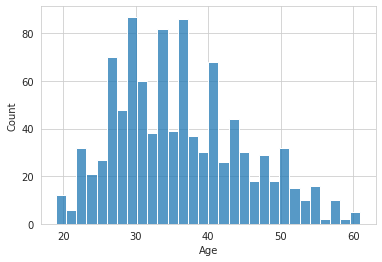

In [7]:
sns.set_style("whitegrid")
sns.histplot(data=df,x="Age",bins=30,legend=False)

**Creating a jointplot showing Area Income versus Age.**

In [8]:
import scipy.stats as stats
pearsonr , p = stats.pearsonr(df["Age"],df["Area Income"])

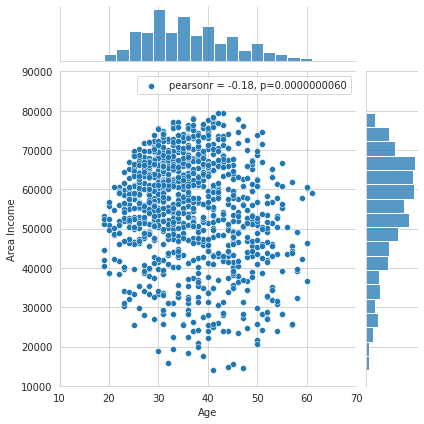

In [9]:
plot = sns.jointplot(x= 'Age', y='Area Income', data=df ,xlim=(10,70) , ylim=(10000,90000), legend = False)
plot.ax_joint.legend(['pearsonr = {:0.2f}, p={:0.10f}'.format(pearsonr, p)])

**Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

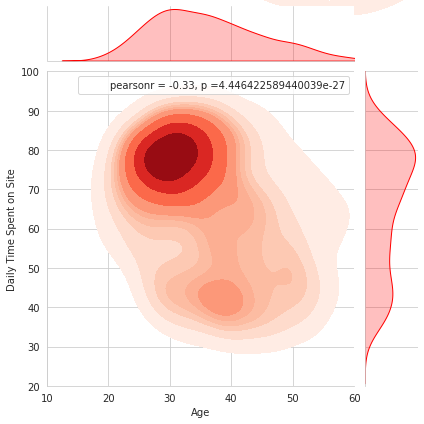

In [10]:
pearsonr , p = stats.pearsonr(df["Age"],df["Daily Time Spent on Site"])
plot=sns.jointplot(x= 'Age', y='Daily Time Spent on Site', data= df,cmap="Reds",xlim = (10, 60), ylim=(20,100),kind="kde",color="Red",fill=True)
plot.ax_joint.legend(['pearsonr = {:0.2f}, p ={}'.format(pearsonr,p)])

** Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

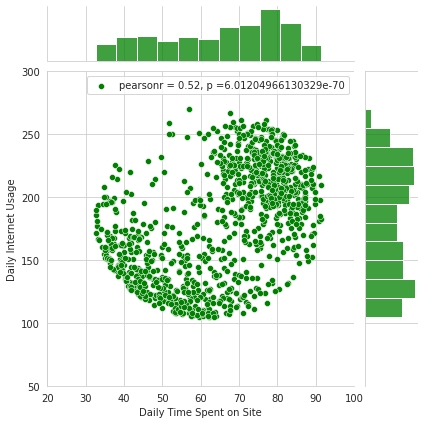

In [11]:
pearsonr , p = stats.pearsonr(df["Daily Time Spent on Site"],df["Daily Internet Usage"])
plot = sns.jointplot(x="Daily Time Spent on Site",y="Daily Internet Usage",data=df,xlim=(20,100),ylim=(50,300),color="green")
plot.ax_joint.legend(['pearsonr = {:0.2f}, p ={}'.format(pearsonr,p)])

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

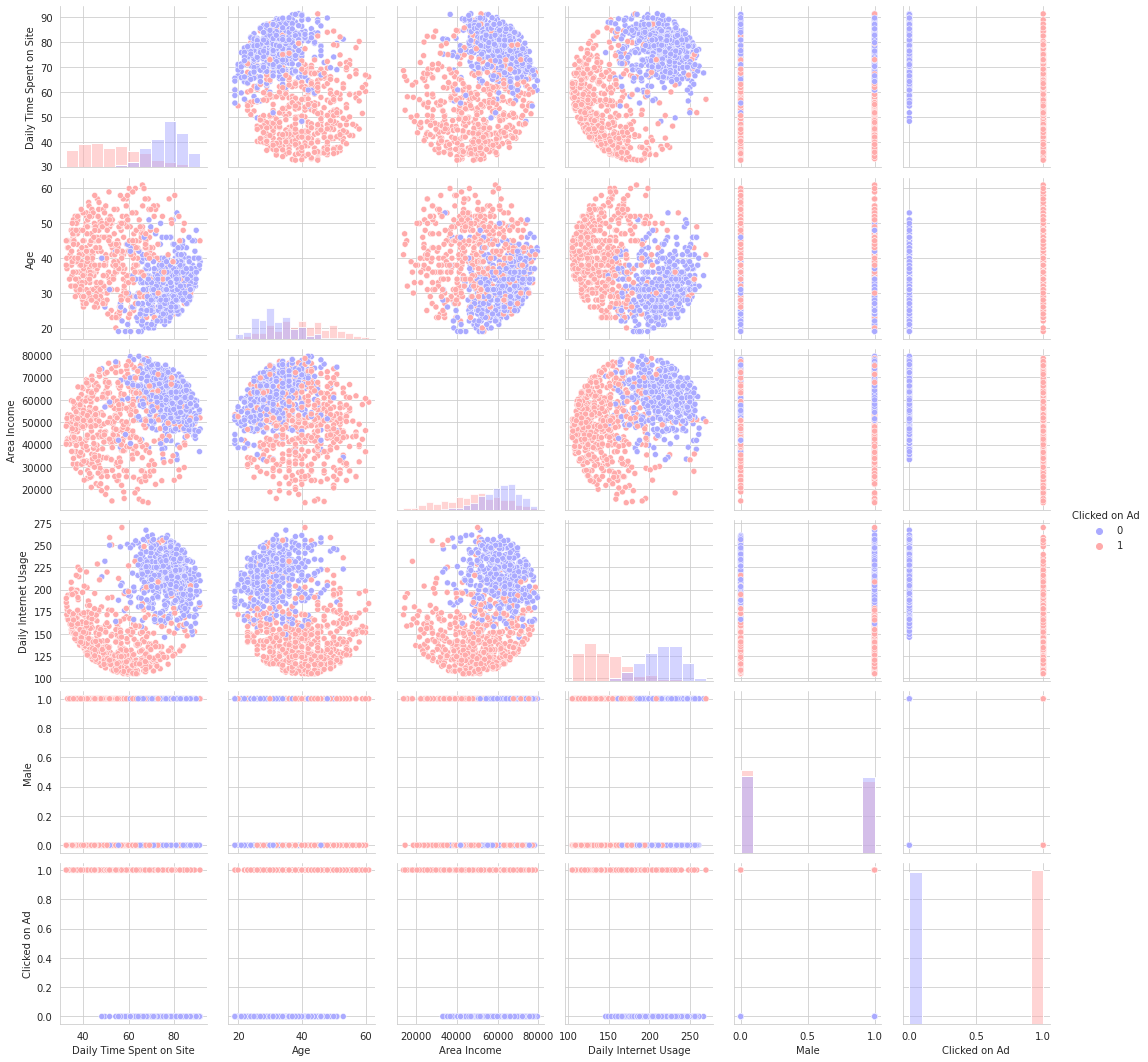

In [12]:
sns.pairplot(df, vars = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male', 'Clicked on Ad'],diag_kind= 'hist', hue = 'Clicked on Ad', hue_order= [0,1],palette="bwr")

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Clicked on Ad','Ad 1','Ad 2','Ad 3','Ad 4','Ad 5','Ad 6','Ad 7','Ad 8','Ad 9','Ad 10'], axis = 1),
                                                    df['Clicked on Ad'], test_size = 0.30,
                                                    random_state = 101)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()

** Train and fit a logistic regression model on the training set.**

In [16]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [17]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

** Create a classification report for the model.**

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       156
           1       0.94      0.90      0.92       144

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#Thompson Sampling

In [19]:
df1 =df[['Ad 1','Ad 2','Ad 3','Ad 4','Ad 5','Ad 6','Ad 7','Ad 8','Ad 9','Ad 10']]

In [20]:
df1

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,1,0,0,0
996,0,0,1,0,0,1,0,0,0,0
997,0,0,0,1,0,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,0


In [21]:
import random
N = 1000 #number of customers
d = 10  #number of ads
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df1.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


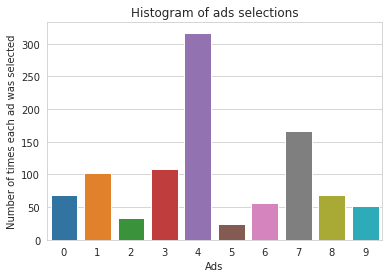

In [22]:
sns.countplot(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()